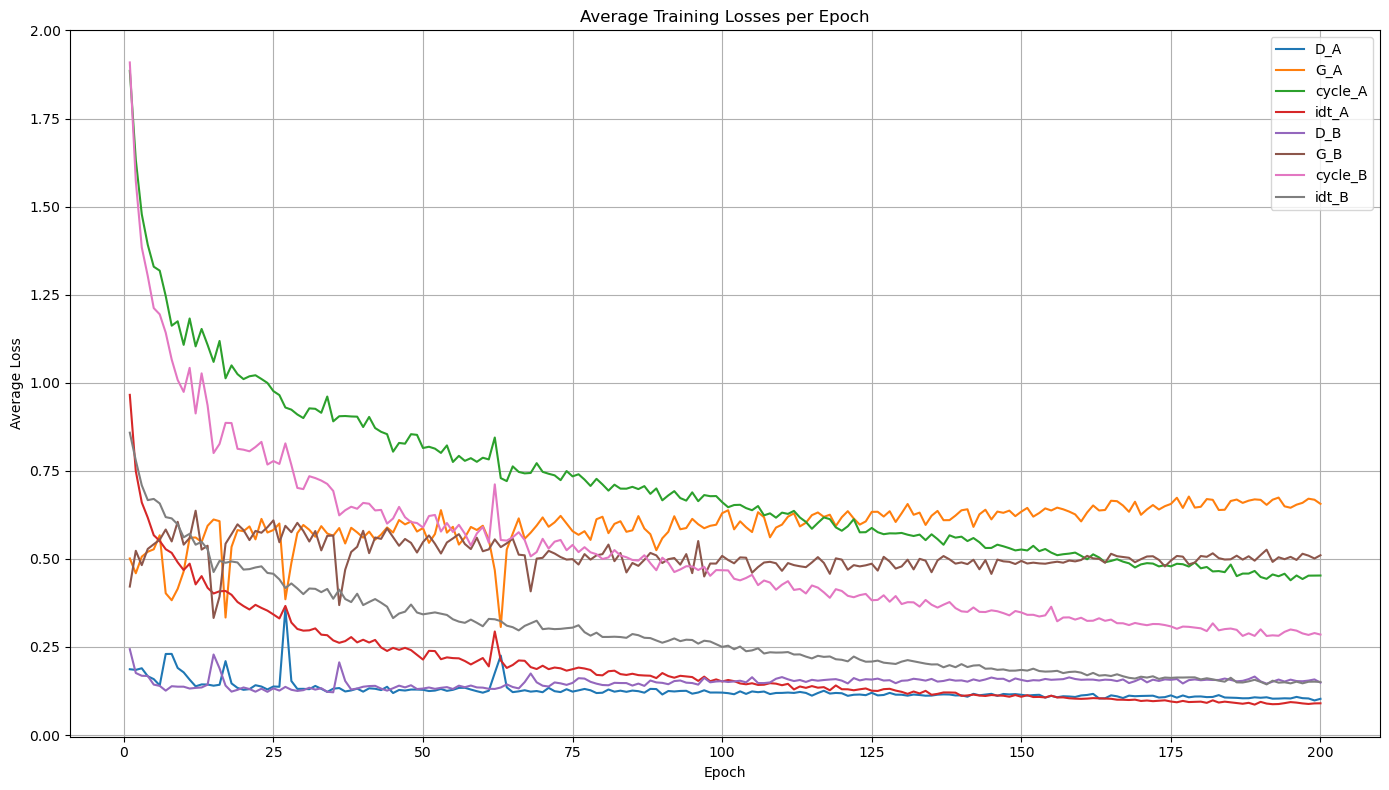

In [2]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict

# Path to your log file
log_file = './checkpoints/human2arcane/loss_log.txt'

epoch_losses = defaultdict(lambda: defaultdict(list))

# Regular expression to extract values
pattern = re.compile(
    r'epoch:\s*(\d+),.*?D_A:\s*([\d.]+)\s*G_A:\s*([\d.]+)\s*cycle_A:\s*([\d.]+)\s*idt_A:\s*([\d.]+)\s*'
    r'D_B:\s*([\d.]+)\s*G_B:\s*([\d.]+)\s*cycle_B:\s*([\d.]+)\s*idt_B:\s*([\d.]+)'
)

# Parse the file
with open(log_file, 'r') as f:
    for line in f:
        match = pattern.search(line)
        if match:
            epoch = int(match.group(1))
            keys = ['D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']
            for i, key in enumerate(keys):
                epoch_losses[epoch][key].append(float(match.group(i + 2)))

# Average losses per epoch
averaged_losses = defaultdict(list)
epochs = sorted(epoch_losses.keys())

for epoch in epochs:
    for key in epoch_losses[epoch]:
        avg = sum(epoch_losses[epoch][key]) / len(epoch_losses[epoch][key])
        averaged_losses[key].append(avg)

# Plotting
plt.figure(figsize=(14, 8))
for key, values in averaged_losses.items():
    plt.plot(epochs, values, label=key)

plt.title('Average Training Losses per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('loss_plot_per_epoch.png')
plt.show()